In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_camping_clean = pd.read_csv('df_camping_clean.csv', encoding='utf-8')

## Datensatz

In [5]:
df_camping_analysis = df_camping_clean.drop(['Name', 'Ortschaft', 'Latitude', 'Longitude','Region', 'Golf', 'Disco'], axis=1)

# Bearbeitete Daten als CSV speichern
df_camping_analysis.to_csv('df_camping_analysis.csv', encoding='utf-8', index=False)

## Datensatz exkl. Multikollinearität

In [6]:
df_camping_analysis_no_cor = df_camping_clean.drop(['Name', 'Ortschaft', 'Latitude', 'Longitude','Region', 'Golf', 'Disco','Region Nordwestschweiz', 'kleiner Platz (<80 m2)'], axis=1)

# Bearbeitete Daten als CSV speichern
df_camping_analysis_no_cor.to_csv('df_camping_analysis_no_cor.csv', encoding='utf-8', index=False)

## Datensatz exkl. Ausreisser
Aussreisser bei Preis und Campingplatzgrösse werden ausgeschlossen

In [7]:
df_camping_analysis_no_outl = df_camping_clean.drop(['Name', 'Ortschaft', 'Latitude', 'Longitude','Region', 'Golf', 'Disco','Region Nordwestschweiz', 'kleiner Platz (<80 m2)'], axis=1)


In [8]:
from scipy import stats

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

def remove_outliers_zscore(data, column, threshold=3):
    #Ein Z-Score-Schwellenwert von 3 bedeutet, dass Datenpunkte, die mehr als 3 Standardabweichungen vom Mittelwert entfernt sind, als Ausreisser betrachtet werden.
    z_scores = stats.zscore(data[column].dropna())
    abs_z_scores = abs(z_scores)
    filtered_entries = (abs_z_scores < threshold)
    return data[filtered_entries]

# Anwenden der IQR-Methode auf das Merkmal "Preis"
df_camping_analysis_no_outl = remove_outliers_iqr(df_camping_analysis_no_outl, 'Preis')
# Anwenden der IQR-Methode auf das Merkmal "Touristenplätze"
df_camping_analysis_no_outl = remove_outliers_iqr(df_camping_analysis_no_outl, 'Touristenstellplätze')


# Anwenden der Z-Score-Methode auf das Merkmal "Preis"
df_camping_analysis_no_outl = remove_outliers_zscore(df_camping_analysis_no_outl, 'Preis')
# Anwenden der Z-Score-Methode auf das Merkmal "Preis"
df_camping_analysis_no_outl = remove_outliers_zscore(df_camping_analysis_no_outl, 'Preis')



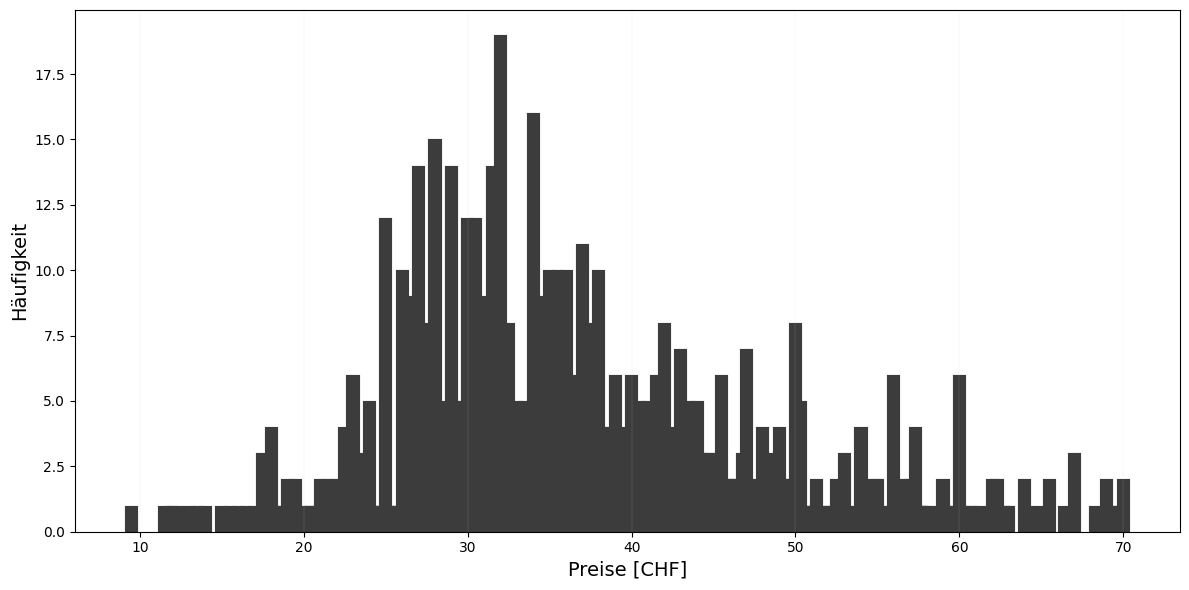

In [9]:
# Preise
value_counts = df_camping_analysis_no_outl['Preis'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))

# Balken plotten
ax.bar(value_counts.index, value_counts.values, color='#3C3C3C', edgecolor='#3C3C3C', linewidth=0.1)

# Achsenbeschriftungen und Titel hinzufügen
ax.set_ylabel('Häufigkeit', fontsize=14)
ax.set_xlabel('Preise [CHF]', fontsize=14)

ax.grid(which='both', axis='x', linestyle='-', linewidth=0.1, color='lightgray')  # Nur horizontale Linien behalten

plt.tight_layout()
plt.show()

In [10]:
df_camping_analysis_no_outl['Preis'].describe()

count    774.000000
mean      36.935258
std       11.188506
min        9.500000
25%       29.000000
50%       34.800000
75%       43.500000
max       70.000000
Name: Preis, dtype: float64

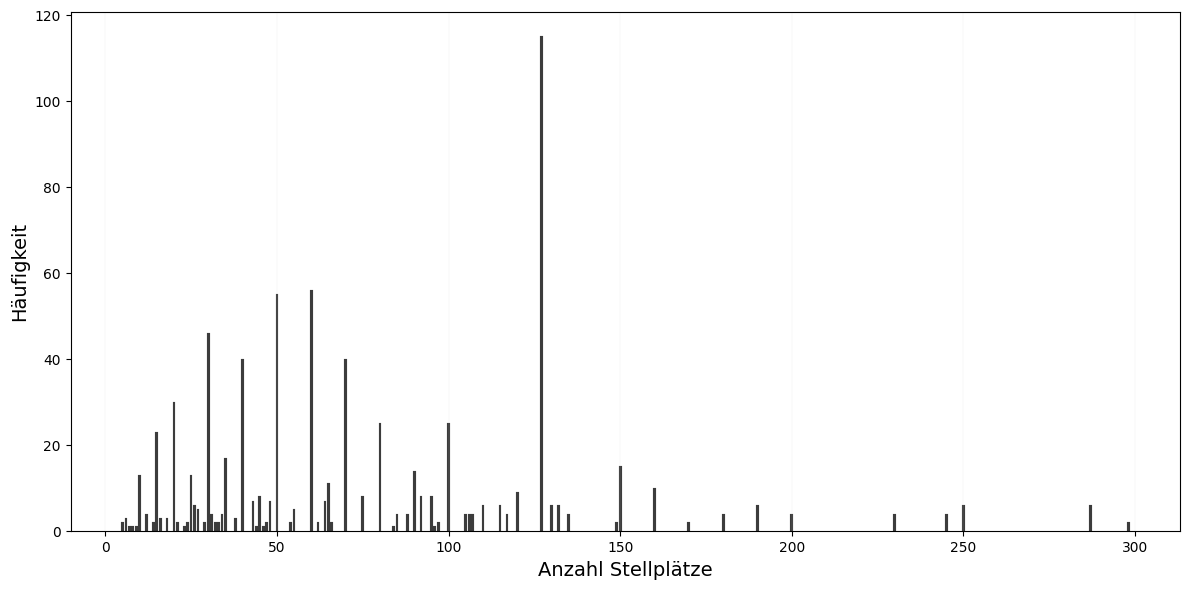

In [11]:
# Grösse des Campingplatzes (Touristenplätze)
value_counts = df_camping_analysis_no_outl['Touristenstellplätze'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))

# Balken plotten
ax.bar(value_counts.index, value_counts.values, color='#3C3C3C', edgecolor='#3C3C3C', linewidth=0.1)

# Achsenbeschriftungen und Titel hinzufügen
ax.set_ylabel('Häufigkeit', fontsize=14)
ax.set_xlabel('Anzahl Stellplätze', fontsize=14)

ax.grid(which='both', axis='x', linestyle='-', linewidth=0.1, color='lightgray')  # Nur horizontale Linien behalten

plt.tight_layout()
plt.show()

In [12]:
df_camping_analysis_no_outl['Touristenstellplätze'].describe()

count    774.000000
mean      78.474160
std       53.690298
min        5.000000
25%       38.000000
50%       64.000000
75%      127.000000
max      298.000000
Name: Touristenstellplätze, dtype: float64

In [13]:
# Bearbeitete Daten als CSV speichern
df_camping_analysis_no_outl.to_csv('df_camping_analysis_no_outl.csv', encoding='utf-8', index=False)

# Datensatz vergrössern

In [14]:
import numpy as np
df = pd.read_csv('df_camping_analysis_no_outl.csv', encoding='utf-8')

# Jittering für numerische Daten
def jitter_data(df, columns, noise_level=0.01):
    jittered_df = df.copy()
    for col in columns:
        jittered_df[col] += np.random.normal(0, noise_level, size=df.shape[0])
    return jittered_df

# Identifizieren numerischer Merkmale
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Anwenden von Jittering
df_jittered = jitter_data(df, numeric_cols)

# Zusammenführen der ursprünglichen und jittered Daten
df_augmented = pd.concat([df, df_jittered])

# Anzeigen des vergrößerten Datensatzes
df_augmented



,Touristenstellplätze,weiter Unterküfte,mittlerer Platz (~100 m2),grosser Platz (>110 m2),Stellplatz am Wasser,Behindertengerechter Zugang,Haustierfreundlichkeit,Waschmaschine und Trockner,Aufenthaltsraum,Gemeinschaftsküche,...,Region Wallis,Region Zentralschweiz,Region Zuerich,Hauptsaison,Nebensaison,Wandern,Strandzugang,Aktivitäten,Bahnhof,Busstation
0,35.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.000000,0.000000,1.000000
1,35.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.000000,0.000000,1.000000
2,35.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,8.000000,0.000000,1.000000
3,35.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,8.000000,0.000000,1.000000
4,70.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,7.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,49.991551,-0.015567,0.008780,0.005112,-0.002988,0.000912,-0.002633,0.989571,1.009325,-0.013656,...,-0.005896,0.004095,0.000628,1.016354,0.996132,0.011610,0.998531,7.005711,-0.013509,0.000502
770,50.013650,0.023758,1.000285,-0.002476,0.021061,0.011249,-0.004375,1.001620,0.997271,0.016488,...,0.001229,-0.004972,-0.010674,0.984230,1.011913,0.006314,0.974185,7.001582,0.002507,-0.015170
771,24.993000,0.009284,-0.008599,0.014144,0.003923,-0.006290,1.011641,0.992191,0.004407,0.012027,...,0.001662,-0.023197,0.001391,0.003819,0.996427,-0.001970,-0.022468,4.992373,1.009349,0.989745
772,25.016427,0.007250,0.006890,0.008323,-0.001098,0.001411,0.997954,1.000090,-0.001691,0.004466,...,-0.010286,0.000347,0.005111,0.994327,0.016827,-0.015130,-0.001627,4.994528,1.000283,1.026257


In [15]:
# Bearbeitete Daten als CSV speichern
df_augmented.to_csv('df_camping_analysis_dopp.csv', encoding='utf-8', index=False)